In [1]:
# Mount Drive
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
base_dir = '/content/drive/Shareddrives/CAPSTONE C23-PS061/Dataset Split'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory:
['train', 'validation']

Contents of train directory:
['Kardus', 'Kaca (White & Green)', 'Plastik', 'Kertas', 'Logam', 'Organik', 'Botol Plastik', 'Botol Kaca']

Contents of validation directory:
['Kardus', 'Kaca (White & Green)', 'Plastik', 'Kertas', 'Logam', 'Organik', 'Botol Plastik', 'Botol Kaca']


In [3]:
# Import train_dir & validation_dir
train_dir = f'{base_dir}/train'
validation_dir = f'{base_dir}/validation'

# Print the number of files in each class for train and validation
print("Number of files in each class (train):")
for class_folder in os.listdir(train_dir):
    class_folder_path = os.path.join(train_dir, class_folder)
    num_files = len(os.listdir(class_folder_path))
    print(f"{class_folder}: {num_files} files")

print("\nNumber of files in each class (validation):")
for class_folder in os.listdir(validation_dir):
    class_folder_path = os.path.join(validation_dir, class_folder)
    num_files = len(os.listdir(class_folder_path))
    print(f"{class_folder}: {num_files} files")

Number of files in each class (train):
Kardus: 623 files
Kaca (White & Green): 560 files
Plastik: 691 files
Kertas: 751 files
Logam: 538 files
Organik: 696 files
Botol Plastik: 700 files
Botol Kaca: 698 files

Number of files in each class (validation):
Kardus: 268 files
Kaca (White & Green): 241 files
Plastik: 304 files
Kertas: 322 files
Logam: 231 files
Organik: 299 files
Botol Plastik: 300 files
Botol Kaca: 300 files


In [4]:
import tensorflow as tf

# Menentukan dimensi gambar dan jumlah kelas
image_width = 200
image_height = 200
num_classes = 8

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Pra-pemrosesan dan augmentasi gambar menggunakan ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,  # Skala ulang intensitas pixel menjadi rentang 0-1
                                   rotation_range=20,  # Rotasi acak gambar dalam rentang 0-20 derajat
                                   width_shift_range=0.2,  # Pergeseran horizontal acak pada gambar
                                   height_shift_range=0.2,  # Pergeseran vertikal acak pada gambar
                                   horizontal_flip=True,  # Flip horizontal acak pada gambar
                                   )  

validation_datagen = ImageDataGenerator(rescale=1./255)  # Skala ulang intensitas pixel gambar validasi

# Menggunakan ImageDataGenerator untuk memuat dan mempersiapkan data latihan
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical')

# Menggunakan ImageDataGenerator untuk memuat dan mempersiapkan data validasi
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical')

Found 5257 images belonging to 8 classes.
Found 2265 images belonging to 8 classes.


In [6]:
from keras.applications import InceptionV3
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Model

pretrained = InceptionV3(input_shape = (image_width, image_height, 3), include_top = False, weights = 'imagenet')
pretrained.trainable = False
layers = Flatten()(pretrained.output)
layers = Dense(64, activation = 'relu')(layers)
outputs = Dense(8, activation = 'softmax')(layers)
model = Model(inputs = [pretrained.input], outputs = [outputs])

87910968/87910968 [==============================] - 3s 0us/step


In [7]:
# Mengompilasi model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 99, 99, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 99, 99, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [8]:
# Melatih model menggunakan data latihan dan validasi
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size)

Epoch 1/20
164/164 [==============================] - 2857s 17s/step - loss: 1.9117 - accuracy: 0.4695 - val_loss: 1.0535 - val_accuracy: 0.6705
Epoch 2/20
164/164 [==============================] - 84s 514ms/step - loss: 0.9707 - accuracy: 0.6869 - val_loss: 0.7816 - val_accuracy: 0.7183
Epoch 3/20
164/164 [==============================] - 88s 535ms/step - loss: 0.7990 - accuracy: 0.7433 - val_loss: 0.6036 - val_accuracy: 0.8112
Epoch 4/20
164/164 [==============================] - 88s 533ms/step - loss: 0.5876 - accuracy: 0.8134 - val_loss: 0.5116 - val_accuracy: 0.8429
Epoch 5/20
164/164 [==============================] - 85s 517ms/step - loss: 0.4942 - accuracy: 0.8389 - val_loss: 0.3912 - val_accuracy: 0.8759
Epoch 6/20
164/164 [==============================] - 85s 518ms/step - loss: 0.4466 - accuracy: 0.8469 - val_loss: 0.3808 - val_accuracy: 0.8723
Epoch 7/20
164/164 [==============================] - 85s 516ms/step - loss: 0.4266 - accuracy: 0.8588 - val_loss: 0.3758 - val_ac

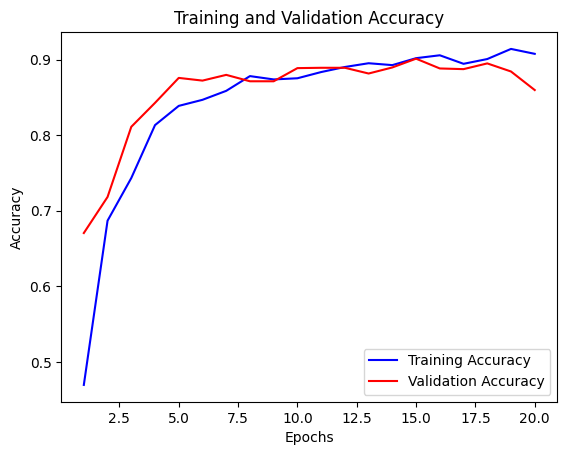

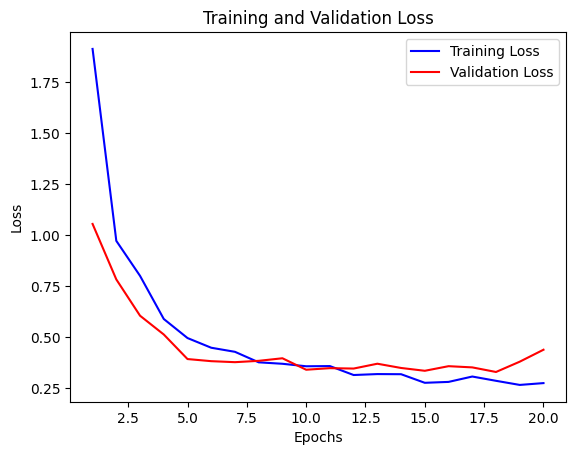

In [9]:
import matplotlib.pyplot as plt

# Mengambil nilai akurasi dan loss dari objek history
accuracy = history.history['accuracy']
loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

# Menghitung jumlah epoch
epochs = range(1, len(accuracy) + 1)

# Plot akurasi training dan validation
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss training
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
# Menyimpan model
model.save('/content/drive/Shareddrives/CAPSTONE C23-PS061/Model/InceptionV3.h5')